# <b>Phase 4: Data Modeling</b>

##### <b>Objectives:</b> 
- Build a model that can predict a song's popularity based on the song's key features. Therefore, we can decide whether a song is a hit based on the score prediction.
- Build a recommendation system that can suggest songs based on user's input choices such as: genre, year, month, artist's popularity,...

### <b><u>Step 1</u>: Import library</b>

##### These are the main libraries used for data modeling:

- `numpy`: work with arrays and some helper functions for modeling
- `pandas`: used to store data as a DataFrame
- `matplotlib`: used to visualize data
- `sklearn`: used train_test_split to split the dataset, KFold to build a cross validation pipeline, LinearRegression and KMeans to build models and metrics to measure the model's accuracy.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression as lr, SGDClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import plotly.express as px
pd.options.mode.chained_assignment = None

### <b><u>Step 2</u>: Get the songs DataFrame from songs exploration notebook to build models</b>

At this step, we need to import the `songs_model_df` from the songs exploration notebook to split data and build models.

In [2]:
%store -r songs_model_df
%store -r songs_df

songs_model_df = songs_model_df
songs_df = songs_df

### <b><u>Step 3</u>: Split the data into training set and test set</b>

Now that we have the songs DataFrame, we would like to split the data into training set and test set, with 80% of training set and 20% of test set using `train_test_split` function.

And then the split data will be stored in 4 variables: `X_train`, `X_test`, `y_train` and `y_test`

In [3]:
X_train, X_test, y_train, y_test = train_test_split(songs_model_df.iloc[:, :-1], songs_model_df.iloc[:, -1], test_size = 0.2, shuffle=True)

Let's re-check the variables' shape

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2400, 6), (2400,), (600, 6), (600,))

So the shapes of these variables are proportionally correct.

Now, let's visualize the songs data to have an overview look.

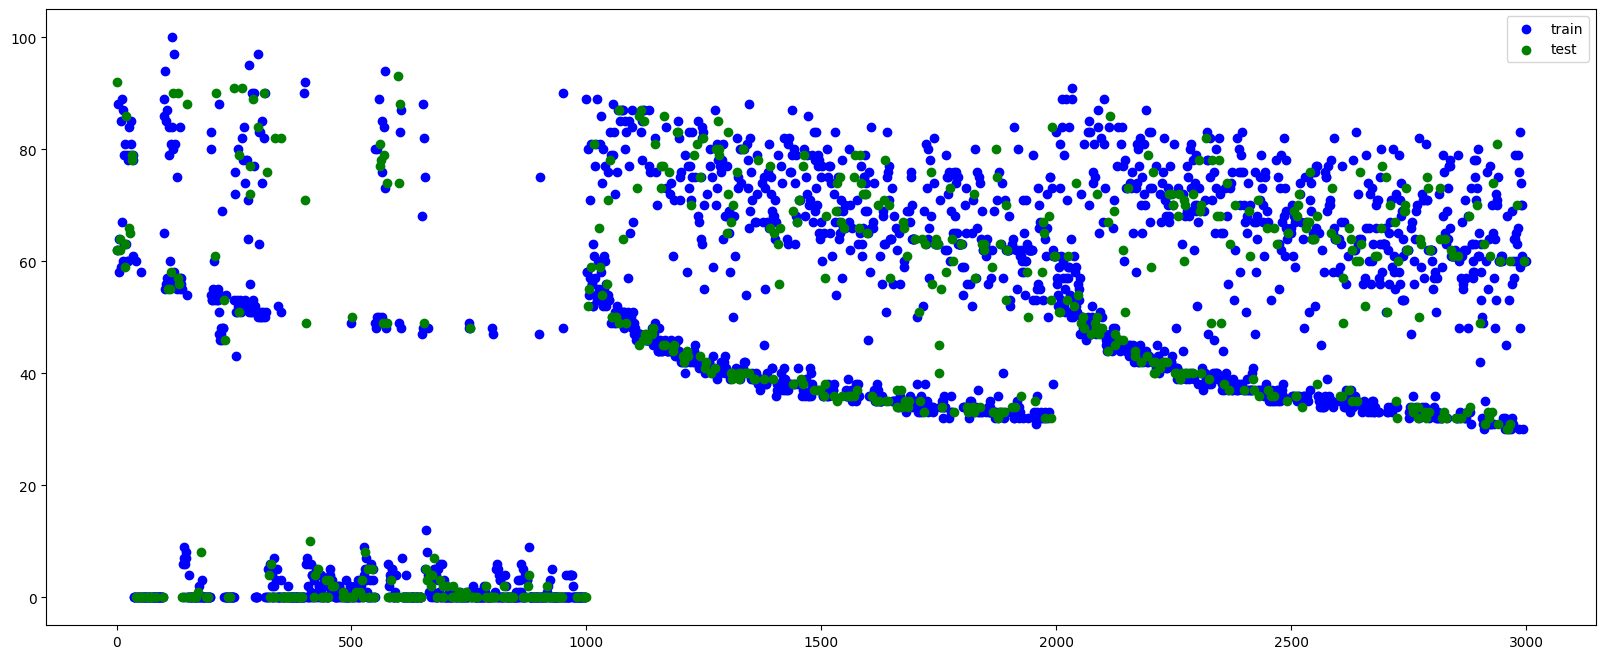

In [5]:
plt.figure(figsize=(20, 8))
plt.scatter(y_train.index, y_train.values, color='b', label='train')
plt.scatter(y_test.index, y_test.values, color='g', label='test')
plt.legend()

So the data is now splitted into training set and test set, with the test set randomly chosen.

----
### <b><u>Step 4</u>: Use different sklearn models with GridSearch and Stratified KFold to compare and choose the best model for prediction</b>

Now, we will use different sklearn models and find their best params using GridSearchCV and StratifiedKFold for cross validation to find their best models and compare between them to declare which will use for the song's popularity score prediction problem.

- **Linear Regression**

In [6]:
%%capture
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
linear_grid = {'positive': [True,False], 
                'fit_intercept': [True, False], 
                'n_jobs': [1, -1]}
linear = GridSearchCV( lr(), param_grid=linear_grid,
                          cv=cv, 
                          scoring='completeness_score', 
                          verbose=0)
linear.fit(X_train, y_train)

In [7]:
print('The best params for model:\n', linear.best_params_)

The best params for model:
 {'fit_intercept': False, 'n_jobs': 1, 'positive': True}


- **Stochastic Gradient Descent**

In [11]:
%%capture
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
SGD_grid = {'loss': ['hinge', 'log', 'perceptron'], 
            'penalty' : ['l1', 'l2'],
            'fit_intercept': [True, False]}
SGD = GridSearchCV( SGDClassifier(),param_grid = SGD_grid,
                          cv=cv, 
                          scoring='completeness_score', 
                          verbose=0) 
SGD.fit(X_train, y_train)

In [12]:
print('The best params for model:\n', SGD.best_params_)

The best params for model:
 {'fit_intercept': True, 'loss': 'log', 'penalty': 'l2'}


- **KNeighbors Classifier**

In [16]:
%%capture
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
kneighbor_grid = {'weights': ['uniform', 'distance'], 
                'algorithm' : ['auto', 'balltree', 'brute'],
                'p': [1, 2], 'n_jobs': [1, -1]}
kneighbor = GridSearchCV( KNeighborsClassifier(),param_grid = kneighbor_grid,
                          cv=cv, 
                          scoring='completeness_score', 
                          verbose=0) 
kneighbor.fit(X_train, y_train)

In [17]:
print('The best params for model:\n', kneighbor.best_params_)

The best params for model:
 {'algorithm': 'auto', 'n_jobs': 1, 'p': 1, 'weights': 'distance'}


- **Decision Tree Classifier**

In [18]:
%%capture
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
tree_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 
            'splitter': ['best', 'random'], 'max_depth': [3, 4, 5],
            'max_features':['auto', 'sqrt', 'log2']}
tree = GridSearchCV( DecisionTreeClassifier(), param_grid=tree_grid,
                          cv=cv, 
                          scoring='completeness_score', 
                          verbose=0) 
tree.fit(X_train, y_train)

In [19]:
print('The best params for model:\n', tree.best_params_)

The best params for model:
 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'splitter': 'random'}


Now we will visualize these models score using bar chart to see the comparison

In [23]:
fig = px.bar(
    x=['Linear Regression', 'Gradient Descent', 'KNeighbors', 'Decision Tree'],
    y=[linear.score(X_test, y_test), SGD.score(X_test, y_test), kneighbor.score(X_test, y_test), tree.score(X_test, y_test)],
    color=['Linear Regression', 'Gradient Descent', 'KNeighbors', 'Decision Tree'],
    labels={'x': 'Model', 'y': 'Accuracy'},
    title='SKLEARN MODELS ACCURACY COMPARISON'
)
fig.show()

/Users/quytrungg/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning:

Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target



**COMMENT:** Stochastic Gradient Descent has the lowest score rate of around 0.45. Hence, this model took the longest time to train and find the best params. KNeighbors and Decision Tree Classifier both has a score rate of approximate 0.55, which is average. And Linear Regression has the highest rate score of over 0.6 and took the fastest time to train. Therefore, we will use this model to predict a song's popularity score.

----
### <b><u>Step 5</u>: Generate Linear Regression model with no bias and RMSE function</b>

At this step, we would like to build our own Linear Regression model with no bias to compare between either model with or without bias will perform better.

Furthermore, there will be a function to calculate the RMSE between the model prediction and the test set.

In [24]:
class LinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T
        self.w = X_pinv @ y
        return self

    def get_weight(self):
        return self.w

    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)

def model_rmse(y_test, y_pred):
    return np.sqrt(np.mean((y_test.ravel() - y_pred.ravel())**2))

### <b><u>Step 6</u>: Train and predict data with no-biased model</b>

Now, we will fit the whole training data into the model and then predict the test data.

In [25]:
model1 = LinearRegression().fit(X_train, y_train)

After we fit the train features and train label set into the model, now let's predict the songs' popularity of the test features set.

Since we would like to have a floor popularity score of 0, any value that is smaller than 0 will be set to 0. Finally, print the model RMSE and visualize the data.

In [26]:
y_pred = model1.predict(X_test)
result1 = pd.DataFrame(y_pred, columns=['popularity'], index=X_test.index)
result1[result1['popularity'] < 0] = 0
print('MSE of biased model:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE of biased model:', model_rmse(y_test, y_pred))
print('MAE of biased model:', metrics.mean_absolute_error(y_test, y_pred))

MSE of biased model: 32.32775731429102
RMSE of biased model: 5.685750373898859
MAE of biased model: 4.335548947753206


The model basically performed pretty well with MSE less than 30, RMSE from 5.0 to 6.0 and MAE around 4.5

Now let's plot the whole train data, test data and predict data to have an overview look on how the model performed.

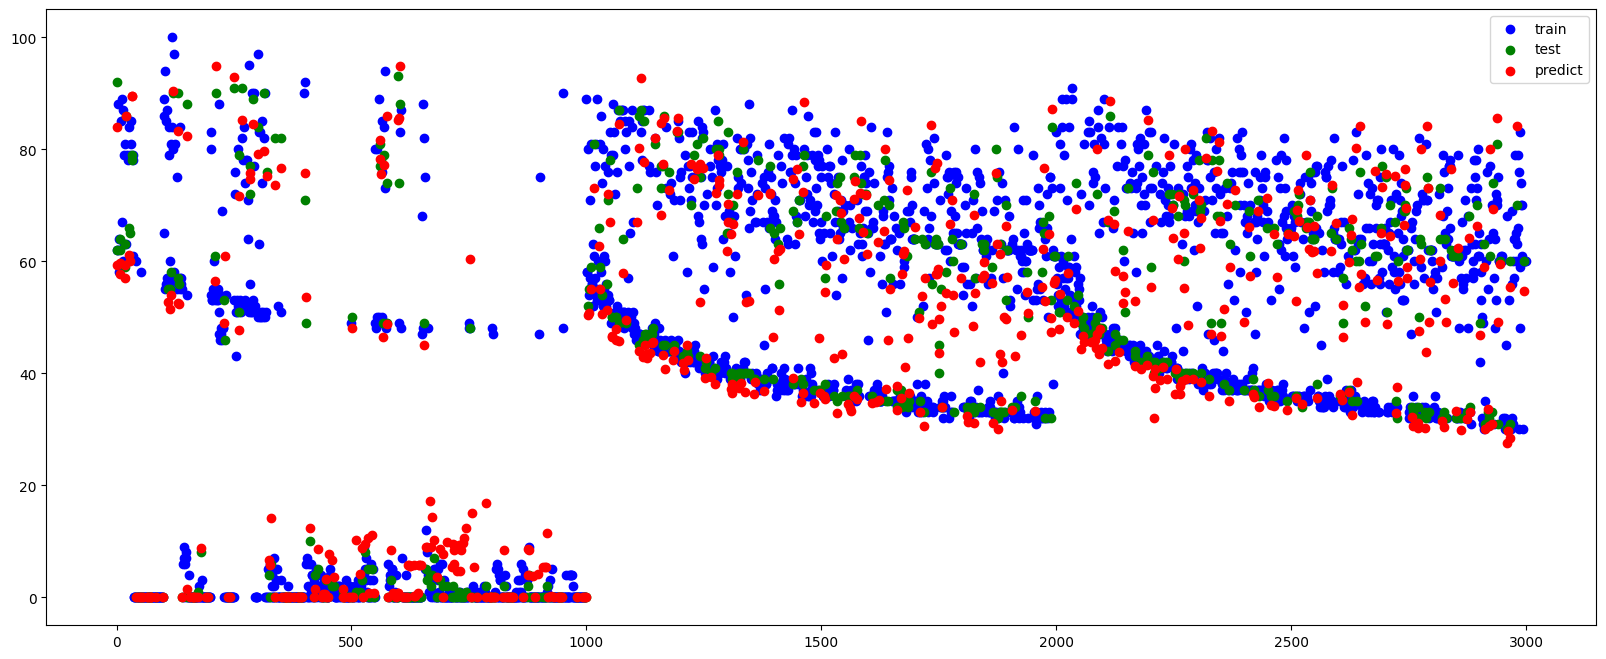

In [27]:
plt.figure(figsize=(20, 8))
plt.scatter(y_train.index, y_train.values, color='b', label='train')
plt.scatter(y_test.index, y_test.values, color='g', label='test')
plt.scatter(result1['popularity'].index, result1['popularity'].values, color='r', label='predict')
plt.legend()

### <b><u>Step 7</u>: Train and predict data with biased model</b>

After we saw how the no-biased model performed, it's time to move on the biased-model using LinearRegression built-in model from sklearn to fit, predict and then check its RMSE score and accuracy score.

In [28]:
model2 = lr().fit(X_train, y_train)
pred = model2.predict(X_test)
result2 = pd.DataFrame(pred, columns=['popularity'], index=X_test.index)
result2[result2['popularity'] < 0] = 0
print('MSE of biased model:', metrics.mean_squared_error(y_test, pred))
print('RMSE of biased model:', model_rmse(y_test, pred))
print('MAE of biased model:', metrics.mean_absolute_error(y_test, pred))
print('Model score:', model2.score(X_test, y_test))

MSE of biased model: 30.30972427089731
RMSE of biased model: 5.5054268018835115
MAE of biased model: 3.875245955504021
Model score: 0.9618829568727845


We can see clearly that the biased model worked better than the no-biased one, also the score of model itself is pretty high (> 85%). Therefore, this model can be used to predict a song's popularity score and decide whether a song is a hit or not.

Finally, let's plot the train data, test data and the predict data to have an overview look.

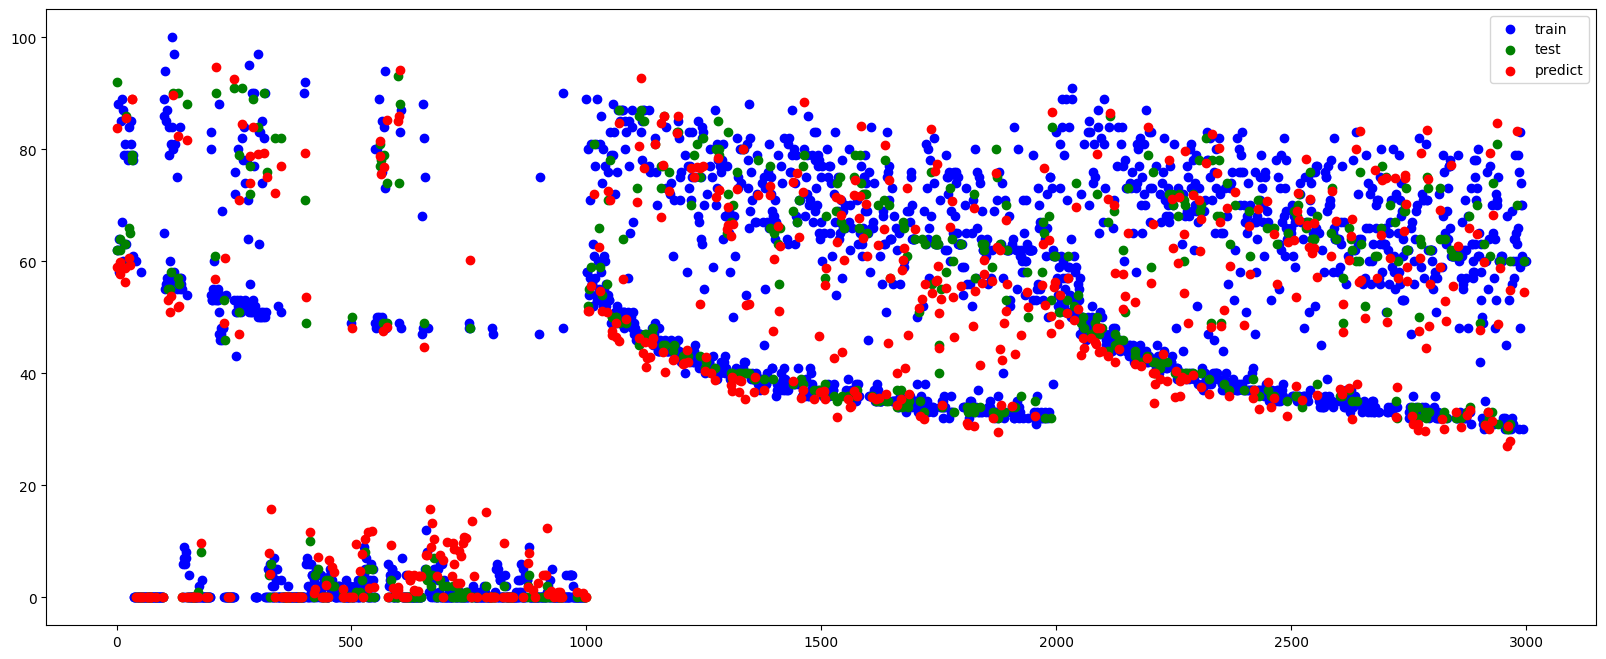

In [29]:
plt.figure(figsize=(20, 8))
plt.scatter(y_train.index, y_train.values, color='b', label='train')
plt.scatter(y_test.index, y_test.values, color='g', label='test')
plt.scatter(result2['popularity'].index, result2['popularity'].values, color='r', label='predict')
plt.legend()

### <b><u>Step 8</u>: Final the most impactful feature of the model</b>

Finally, we would like to know which feature has the most impact in the model, aka the importance variable of the model. 

To verify, we will use the `K-Fold cross validation` method, splitting the data into 5 equal parts and train + test each feature one at a time to find its best model and compare the RMSE to find out which feature performs best.

In [30]:
def train_each_feature_cross_validation(train, fold = 5):
    feature = {k: 0 for k in train.columns if k != 'popularity'}

    for train_split, test_split in KFold(n_splits=fold, shuffle=True).split(train):
        for column in feature.keys():
            feature_train = np.array(train.iloc[train_split].loc[:,[column]])
            label_train = np.array(train.iloc[train_split].loc[:,['popularity']])

            feature_test = np.array(train.iloc[test_split].loc[:,[column]])
            label_test = np.array(train.iloc[test_split].loc[:,['popularity']])
                
            model = LinearRegression().fit(feature_train, label_train)
            pred = model.predict(feature_test)
            rmse = model_rmse(label_test, pred)

            feature[column] += rmse

    return {k: v/fold for k, v in feature.items()}

Now, let's run the function and choose the best feature with the smallest RMSE from its best model.

In [31]:
features = train_each_feature_cross_validation(pd.concat([X_train, y_train], axis=1))
best_feature = min(features, key=features.get)
print('The best feature in the dataset (most correlated feature to label):', best_feature)

The best feature in the dataset (most correlated feature to label): album_popularity


As we expected from the exploration phase and analysis phase, `album_popularity` is the most correlated feature to `popularity` feature, meaning that it is the most impactful feature that helps the model to predict a song's popularity score.

Finally, let's plot the data based on the `album_popularity` and `popularity` features to see how much they are correlated.

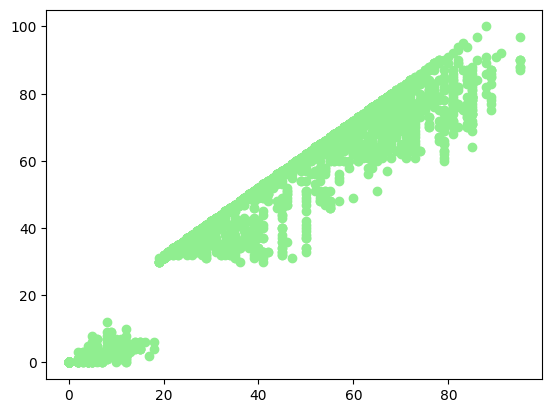

In [33]:
plt.scatter(songs_model_df.loc[:, 'album_popularity'], songs_model_df.loc[:, 'popularity'], color='lightgreen')
plt.show()

----
### <b><u>Step 9</u>: Build models using KMeans Clustering for song recommendation system</b>

For additional data modeling, we would like to build a simple song recommendation system using KMeans Clustering model. User will input some information such as:
- `How many artist(s) involved in a song? (orginal artist or collaboration)`
- `What is the artist's popularity? (some people would like a lowkey artist)`
- `What year and month are you looking for?`
- `What genre are you looking for?`

First, add year column and month column to the song's DataFrame. After that, choose the following columns: `artist_popularity`, `artists_count`, `year`, `month`, `main_genre`.

In [51]:
songs_df['year'] = songs_df['released_date'].dt.year
songs_df['month'] = songs_df['released_date'].dt.month

recommend_df = songs_df[['artist_popularity', 'artists_count', 'year', 'month', 'main_genre']]
recommend_df.head()

,artist_popularity,artists_count,year,month,main_genre
0,100,3,2022,11,k-pop boy group
1,77,2,2022,8,None
2,56,1,2022,11,v-pop
3,54,1,2022,10,vietnamese singer-songwriter
4,81,1,2022,12,k-rap


Now, we need to normalize the `main_genre` column by mapping from `string` to `int`, each genre will be labeled as 0, 1, 2,...

In [52]:
genres_dict = {g: 0 for g in recommend_df['main_genre'].unique()}
idx = 0

for i,_ in genres_dict.items():
    genres_dict[i] = idx
    idx += 1

After mapping all the genres to numeric type, convert the DataFrame into a NumPy array.

In [53]:
recommend_df['main_genre'] = recommend_df['main_genre'].map(genres_dict)
recommend_np = recommend_df.to_numpy()
recommend_np

array([[ 100,    3, 2022,   11,    0],
       [  77,    2, 2022,    8,    1],
       [  56,    1, 2022,   11,    2],
       ...,
       [  72,    1, 2020,   12,  111],
       [  79,    1, 2020,    7,  120],
       [ 100,    2, 2020,    9,   99]])

Since we do not know how much clusters should we split for the data, we will run a for loop from 1 to 14 which is the number of clusters respectively and store the `inertia_` variable into an array.

In [54]:
sum_distances = []
K = range(1,15)
for k in K:
  k_mean = KMeans(n_clusters=k)
  k_mean.fit(recommend_np)
  sum_distances.append(k_mean.inertia_)

After that, we will plot that array with line chart.

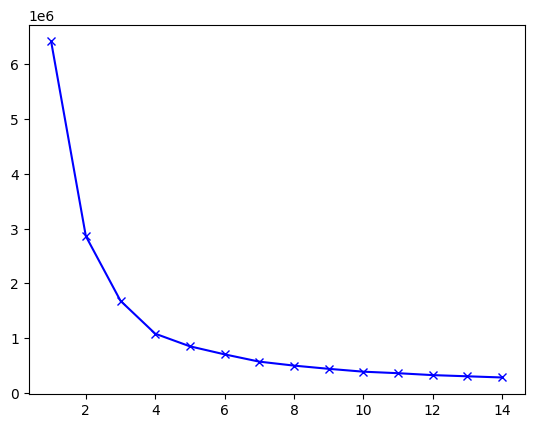

In [55]:
plt.plot(K, sum_distances, 'bx-')
plt.show()

**COMMENT:** As we can see, from cluster n=4, the line chart does not drop significantly as much as those clusters smaller than 4, which means n=4 is the best cluster to split the data points.

Now, let's rebuild the KMeans model with cluster n=4 and train the data, then use a metric called `Silhouette score` to evaluate the model.

In [56]:
k_mean_4 = KMeans(n_clusters=4)
model = k_mean_4.fit(recommend_np)
result = k_mean_4.labels_

In [57]:
print('Silhouette_score', metrics.silhouette_score(recommend_np, result, metric='euclidean'))

Silhouette_score 0.5127270222206628


Next step, we will plot the whole data points with their own clusters and centroids using scatter plot.

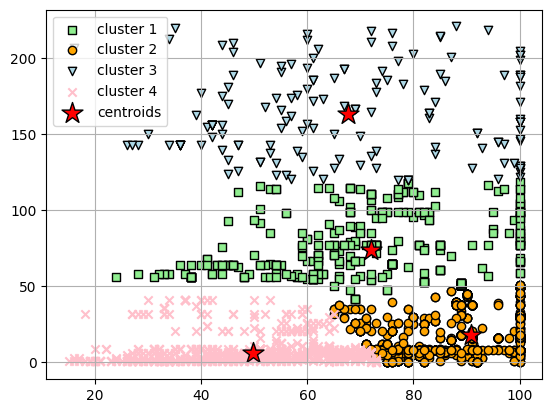

In [58]:
plt.scatter(
    recommend_np[result == 0, 0], recommend_np[result == 0, -1],
    c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    recommend_np[result == 1, 0], recommend_np[result == 1, -1],
    c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    recommend_np[result == 2, 0], recommend_np[result == 2, -1],
    c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    recommend_np[result == 3, 0], recommend_np[result == 3, -1],
    c='pink',
    marker='x',
    label='cluster 4'
)

plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, -1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

After having a cluster, now we add a column called `cluster` to assign their cluster to the DataFrame.

In [59]:
songs_df['cluster'] = result

We now build a function to take in the user inputs about their music choices and use the KMeans model to predict and generating songs with the same cluster as user's choices and recommend the first 5 songs from that cluster.

In [60]:
def recommend(model, art_pop, artist_count, year, month, main_genre):
  arr = np.array([[art_pop, artist_count, year, month, main_genre]])
  pred = model.predict(arr)
  return songs_df[songs_df['cluster'] == pred[0]].sample(5)

Finally, this is a simple test for the recommendation system and the result.

In [61]:
art_pop = 50
artist_count = 1
year = 2020
month = 6
main_genre = 'pop'
try:
    main_genre = genres_dict[main_genre]
except:
    for i,_ in genres_dict.items():
        if main_genre in i:
            main_genre = genres_dict[i]
            break

recommend(model, art_pop, artist_count, year, month, main_genre)

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,popularity,main_genre,artists_count,year,mongth,month,cluster
1365,0xb1ue2OVMsd3DVzjzUrrH,Thêm Bao Nhiêu Lâu,[Rin],None,80,21,183,Thêm Bao Nhiêu Lâu,2021-08-02,26,182751,38,None,1,2021,8,8,3
1938,29Iqky207Y14lJip5DkFiN,Has To Be,[CapzLock],None,20286,51,184,Has To Be,2021-12-22,52,115744,63,None,1,2021,12,12,3
752,1QwSqNlknVSTdmmtjsOGM9,dằm trong tim,"[Suni Hạ Linh, TDK]",[v-pop],194059,67,182,Hương Mùa Hè,2022-07-24,54,230000,48,v-pop,2,2022,7,7,3
1903,5Ix3TvUO2MOoFjOhfsg9Xv,NGỌN NẾN (feat. Coldzy),"[RAP VIỆT, Coldzy]","[vietnamese hip hop, v-pop, vietnamese melodic...",951261,59,183,Rap Việt Season 2 - Tập 4,2021-11-08,27,187200,33,vietnamese hip hop,2,2021,11,11,3
2106,0J2otOvMdg62gVMMjwOvSK,Hoa Hải Đường,[Jack - J97],[v-pop],442832,37,183,Hoa Hải Đường,2020-09-22,34,229589,46,v-pop,1,2020,9,9,3


----
### <b> This is the end of Phase 4</b>